In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

x = plt.xlim(0,10)
y = plt.ylim(0,10)
xrd = 10*random.random()
yrd = 10*random.random()
xsum = [xrd]
ysum = [yrd]
pointsum = (xsum, ysum)
plt.plot(xsum,ysum,'ro')
while len(xsum) <= 100:
    xrd2 = 10*random.random()
    yrd2 = 10*random.random()
    pt1 = np.array(([xrd],[yrd]))
    pt2 = np.array(([xrd2],[yrd2]))
    dis = np.sqrt(np.sum((pt1-pt2)**2))
    if dis <= 5:
        xsum.append(xrd2)
        ysum.append(yrd2)
        plt.plot(xsum,ysum,'ro')
        plt.plot(xsum,ysum)
        xrd = xrd2
        yrd = yrd2

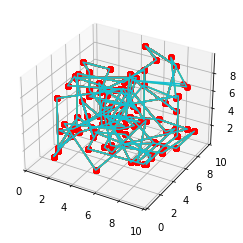

In [2]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline
fig = plt.figure()
ax = plt.axes(projection='3d')
x = plt.xlim(0,10)
y = plt.ylim(0,10)
z = np.linspace(0,10)
xrd = 10*random.random()
yrd = 10*random.random()
zrd=10*random.random()
xsum = [xrd]
ysum = [yrd]
zsum = [zrd]

pointsum = (xsum, ysum,zsum)
plt.rcParams['savefig.dpi'] = 500 #图片像素
plt.plot(xsum,ysum,zsum,'ro')
while len(xsum) <= 100: #移动一百步
    xrd2 = 10*random.random()
    yrd2 = 10*random.random()
    zrd2 = 10*random.random()
    pt1 = np.array(([xrd],[yrd],[zrd]))
    pt2 = np.array(([xrd2],[yrd2],[zrd2]))
    dis = np.sqrt(np.sum((pt1-pt2)**2))
    if dis <= 5: #若距离小于五,则一次布朗运动能达到
        xsum.append(xrd2)
        ysum.append(yrd2)
        zsum.append(zrd2)
        plt.plot(xsum,ysum,zsum,'ro')
        plt.plot(xsum,ysum,zsum)
        xrd = xrd2
        yrd = yrd2
        zrd = zrd2

In [ ]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def random_dir():
    direction = {1: (0, 1), 2: (0, -1), 3: (1, 0), 4: (-1, 0)} #put possible directions in a dict
    
    xk = (1, 2, 3, 4)
    pk = (0.25, 0.25, 0.25, 0.25)
    
    unifdb = stats.rv_discrete(name = 'unifdb', values = (xk, pk))
    # See FUNCTIONAL PROGRAMMING
    return direction[unifdb.rvs()]
    # function stats.rv_discrete.rvs() draw a random number according to the rules given

def random_walk(n, starting = (0, 0)):
    fig, ax = plt.subplots()

    Path = mpath.Path
    path_data = [(Path.MOVETO, starting)]

    l = [starting]
    for k in range(n):
        l.append(random_dir())
        s = tuple([sum(x) for x in zip(*l)])
        print(s)
        l=[s]
        path_data.append((Path.CURVE4, s)) 

    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    
    x, y = zip(*path.vertices)
    line, = ax.plot(x, y)
    ax.plot(starting[0], starting[1], 'ro')

    ax.grid()
    #ax.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    
def normalized_random_walk(N, t, starting=(0, 0)):
    fig, ax = plt.subplots()

    Path = mpath.Path
    path_data = [(Path.MOVETO, starting)]

    n = int(N * t)
    l = [starting]
    for k in range(n):
        l.append(tuple(1.0/np.sqrt(N) * x for x in random_dir()))
        s = tuple(sum(x) for x in zip(*l))
        l=[s]
        path_data.append((Path.CURVE4, s)) 
            
    l.append(tuple((N * t - n)/np.sqrt(N) * x for x in random_dir()))
    
    path_data.append((Path.CURVE4, tuple(sum(x) for x in zip(*l))))
    

    codes, verts = zip(*path_data)
    path = mpath.Path(verts, codes)
    
    # plot control points and connecting lines
    x, y = zip(*path.vertices)
    line, = ax.plot(x, y)
    ax.plot(starting[0], starting[1], 'ro')

    ax.grid()
    #ax.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
random_walk(100)